In [2]:
import numpy as np
import json_tricks
import scipy as sp
from types import SimpleNamespace
import matplotlib.pyplot as plt

In [3]:
answer = SimpleNamespace()

answer.A = np.array(
    ### YOUR CODE HERE ###
    [[1, 1],
     [-2, -1]]
)

answer.eig_values = np.array( 
    ### YOUR CODE HERE ###
    [
        1j, -1j
    ]
)

answer.eig_vectors = np.array(
    ### YOUR CODE HERE ###
    [
        [-0.5 - 0.5j, -0.5 + 0.5j],
        [1          , 1]
        
    ]
)

In [4]:
## Checking that matrix
## is recosntructed from eigenvalues and eigenvectors

V = answer.eig_vectors
L = np.diag(answer.eig_values)

print(V @ L @ np.linalg.inv(V))

[[ 1.+0.j  1.+0.j]
 [-2.+0.j -1.+0.j]]


In [5]:
def general_solution(t, C):
    res = np.zeros([C.shape[0], t.shape[0]]).astype(complex)
    # --placeholder start--
    for k in range(len(answer.eig_values)):
        res += C[k] * np.exp(answer.eig_values[k] * t) * answer.eig_vectors[:, [k]]
    # --placeholder end--
    return res

Text(0.5, 1.0, 'Population Dynamics')

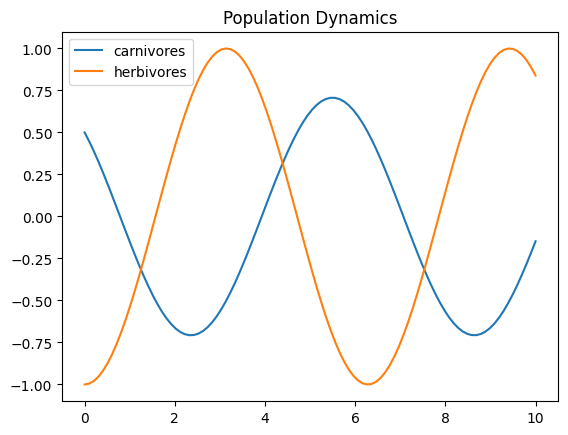

In [6]:
## Visualizing the evolution of the state for some C
C = np.array([1, -2])
t = np.linspace(0, 10, 100)

res = general_solution(t, C).real
answer.general_solution = res

plt.plot(t, res[0, :])
plt.plot(t, res[1, :])
plt.legend(['carnivores', 'herbivores'])
plt.title('Population Dynamics')

In [13]:
def solution_matrix_exponent(t, x0):
    res = np.zeros([x0.shape[0], t.shape[0]])
    ### YOUR CODE HERE ###
    print(x0)
    for idx, i in enumerate(t):
        print(i)
        res[:, idx] = V @ (np.diag(np.exp((answer.eig_values) * i))) @ np.linalg.inv(V) @ x0

    return res

[100 100]
0.0
0.10101010101010101
0.20202020202020202
0.30303030303030304
0.40404040404040403
0.5050505050505051
0.6060606060606061
0.7070707070707071
0.8080808080808081
0.9090909090909091
1.0101010101010102
1.1111111111111112
1.2121212121212122
1.3131313131313131
1.4141414141414141
1.5151515151515151
1.6161616161616161
1.7171717171717171
1.8181818181818181
1.9191919191919191
2.0202020202020203
2.121212121212121
2.2222222222222223
2.323232323232323
2.4242424242424243
2.525252525252525
2.6262626262626263
2.727272727272727
2.8282828282828283
2.929292929292929
3.0303030303030303
3.131313131313131
3.2323232323232323
3.3333333333333335
3.4343434343434343
3.5353535353535355
3.6363636363636362
3.7373737373737375
3.8383838383838382
3.9393939393939394
4.040404040404041
4.141414141414141
4.242424242424242
4.343434343434343
4.444444444444445
4.545454545454545
4.646464646464646
4.747474747474747
4.848484848484849
4.94949494949495
5.05050505050505
5.151515151515151
5.252525252525253
5.3535353535353

/tmp/ipykernel_15617/611368665.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  res[:, idx] = V @ (np.diag(np.exp((answer.eig_values) * i))) @ np.linalg.inv(V) @ x0


Text(0.5, 1.0, 'Population Dynamics')

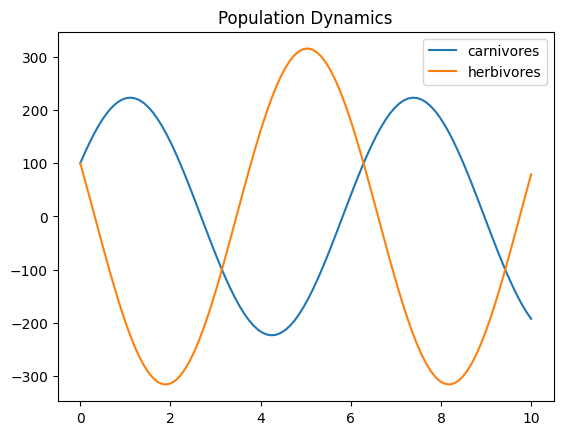

In [14]:
## Visualizing the evolution of the state for x0
x0 = np.array([100, 100])
t = np.linspace(0, 10, 100)

res = solution_matrix_exponent(t, x0).real
answer.solution_matrix_exponent = res

print(t.shape, res.shape)
plt.plot(t, res[0, :])
plt.plot(t, res[1, :])
plt.legend(['carnivores', 'herbivores'])
plt.title('Population Dynamics')

In [69]:
answer.coefficients = np.array(
    ### YOUR CODE HERE ###
    [(100*1j-300)/(1+1j), (300+100*1j)/(1+1j)]
    
)

(2,)
(100,)


Text(0.5, 1.0, 'Population Dynamics')

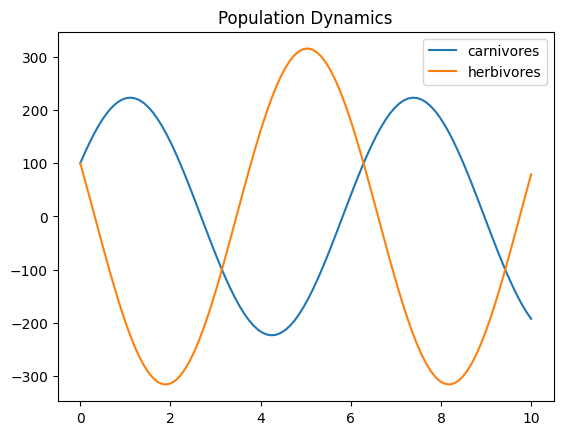

In [70]:
## Visualizing for Cs for x0
C = answer.coefficients
t = np.linspace(0, 10, 100)

print(C.shape)
print(t.shape)

res = general_solution(t, C).real
answer.general_solution = res

plt.plot(t, res[0, :])
plt.plot(t, res[1, :])
plt.legend(['carnivores', 'herbivores'])
plt.title('Population Dynamics')

In [71]:
json_tricks.dump(vars(answer), '.answer.json')

'{"A": {"__ndarray__": [[1, 1], [-2, -1]], "dtype": "int64", "shape": [2, 2], "Corder": true}, "eig_values": {"__ndarray__": [{"__complex__": [0.0, 1.0]}, {"__complex__": [-0.0, -1.0]}], "dtype": "complex128", "shape": [2]}, "eig_vectors": {"__ndarray__": [[{"__complex__": [-0.5, -0.5]}, {"__complex__": [-0.5, 0.5]}], [{"__complex__": [1.0, 0.0]}, {"__complex__": [1.0, 0.0]}]], "dtype": "complex128", "shape": [2, 2], "Corder": true}, "general_solution": {"__ndarray__": [[100.0, 119.65796563730393, 138.09609390450703, 155.1264197315427, 170.5753297048937, 184.28533194666926, 196.11666164481016, 205.94870586705636, 213.68123313359888, 219.23541521369822, 222.5546307297006, 223.6050423762141, 222.37594187006198, 218.87985911446478, 213.15243446459263, 205.2520553966586, 195.25926128448285, 183.27592235145448, 169.42420116795682, 153.8453072811342, 136.69805767276256, 118.1572577204475, 98.41191916722629, 77.66333326624894, 56.12301874361063, 34.01056549855893, 11.551396023188161, -11.0255

In [14]:
### HERE YOU CAN EXPERIMENT AND BUILD ADDITIONAL MATRICES